As with the 2D version, in this simulation the required libraries are: 
- Numpy: For calculations
- Matplotlib.pyplot: For plotting of the results
- Random: Generation of random numbers
- Math: Essentially for mathematical constants
- Time: To check the performance of the algorithm
- mplot3d: For 3D plotting in some testing
- OS: to navigate the potential saved files

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random
import math
import time
from mpl_toolkits.mplot3d import Axes3D
import os


The particles are generated on a cylindrical basis, propagated through a cartesian reference system, and saved again on the cylindrical basis ($\theta$ holds the information on the L/D factor and $\phi$ offers information regarding the angular homogeneity of the field).
<img src="Coordinate_3D_system.png" style="width: 800px;"/>
The 5 following functions are the heart and soul of the code.
- randomangle_Cone: makes use of the coordinate system on the image above to generate the angles of the neutrons distributed uniformly in $\phi$ and in $cos(\theta)$.
- position_uniform: generates the neutrons' positions uniformly distributed in X and Y within the range $[lower_generator,upper_generator]$
- format_radians_label + convert_polar_xticks_to_radians: two functions used to transform from degrees to radians and set the axis on the plots.
- histogram: Takes care of the analysis of the simulation, including the plot of the whole routine and analysis of a single point/region, both in $\theta$ and $\phi$

In [8]:
def randomangle_Cone(alpha):
    theta = math.pi/2 -np.arccos(random.random()*np.cos(math.pi/2-alpha/2))
    phi   = random.random()*2*math.pi
    A = np.sqrt(1+np.tan(phi)**2)
    if math.pi/2 < phi <= 3*math.pi/2:
        ZX = - np.arctan(np.tan(theta)/A)
        ZY = - np.arctan(np.tan(theta)*np.tan(phi)/A)
    else:
        ZX = np.arctan(np.tan(theta)/A)
        ZY = np.arctan(np.tan(theta)*np.tan(phi)/A)
    return(ZX,ZY,theta,phi)

def position_uniform(lower_generator,upper_generator):
    #uniformly generated particles on the range [lower_generator,upper_generator]
    return (lower_generator + random.random()*(upper_generator-lower_generator),lower_generator + random.random()*(upper_generator-lower_generator))

def format_radians_label(float_in):
    # Converts a float value in radians into a
    # string representation of that float
    string_out = str(float_in / (np.pi))+"π"
    
    return string_out
def convert_polar_xticks_to_radians(ax):
    # Converts x-tick labels from degrees to radians
    
    # Get the x-tick positions (returns in radians)
    label_positions = ax.get_xticks()
    
    # Convert to a list since we want to change the type of the elements
    labels = list(label_positions)
    
    # Format each label (edit this function however you'd like)
    labels = [format_radians_label(label) for label in labels]
    
    ax.set_xticklabels(labels)
    
def histogram (IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP,col_D,col_L):
    hist,xax,yax,image = plt.hist2d(PosXX,PosYY,bins=200,range=[[0,50],[0,50]])
    print(hist[0,1])
    plt.show()
    plt.close()
    plt.plot(hist[87])
    plt.show()
    plt.close()
    #hist_resh = np.reshape(hist,[200,200])
    
    for j in range(bonus):
        for i in range(bonus):
            hist[IndexX+j,IndexY+i]=0
    fig1 = plt.figure(figsize=(14,10))
    mat = fig1.add_subplot(111)
    tax = mat.matshow(hist)
    plt.show()
    plt.close()

    indices_X = [idx for idx,val in enumerate(PosXX) if xax[IndexX]< val <= xax[IndexX+bonus]]
    indices_Y = [idx for idx,val in enumerate(PosYY) if yax[IndexY]< val <= yax[IndexY+bonus]]
    set_IndicesX = set(indices_X)
    set_IndicesY = set(indices_Y)
    common = []
    if set_IndicesX & set_IndicesY:
        common = set_IndicesX & set_IndicesY
    Distribution_theta = np.zeros(len(common))
    Distribution_phi = np.zeros(len(common))
    i = 0
    for elem in common:
        Distribution_theta[i] = AnT[elem]
        Distribution_phi[i] = AnP[elem]
        i+=1
    fig , (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
    fig.set_figheight(5)
    fig.set_figwidth(30)
    ax1.hist(Distribution_theta,20)
    ax1.set_title("Theta distribution (rad) selected area")
    ax1.set_xlabel("Rad")
    ax1.set_ylabel("Counts")
    ax2.hist(Distribution_phi,20)
    ax2.set_title("Phi distribution (rad) selected area")
    ax2.set_xlabel("Rad")
    ax2.set_ylabel("Counts")
    ax3.hist(AnT,200)
    ax3.set_title("Theta distribution (rad) total")
    ax3.set_xlabel("Rad")
    ax3.set_ylabel("Counts")
    ax4.hist(AnP,200)
    ax4.set_title("Phi distribution (rad) total")
    ax4.set_xlabel("Rad")
    ax4.set_ylabel("Counts")
    plt.show()
    plt.close()
    values,bins,patches = plt.hist(Distribution_phi,60)
    plt.show()
    plt.close()
    fig2 = plt.figure()
    fig2.set_figheight(7)
    fig2.set_figwidth(25)
    ay1 = plt.subplot(1,3,2)
    ay1.hist(Distribution_phi,40,range=[0,6.29])
    ay1.set_title("Phi distribution (rad) selected")
    ay1.set_xlabel("Rad")
    ay1.set_ylabel("Counts")
    ay2 = plt.subplot(1,3,1)
    ay2.hist(Distribution_theta,bins=60,range=[0,0.02])
    ay2.set_title("Theta distribution (rad) selected")
    ay2.set_xlabel("Rad")
    ay2.set_ylabel("Counts")
    ay3 = plt.subplot(133,projection="polar")
    ay3.bar(bins[:60],values,width=0.2,bottom=0.0,align="center")
    ay3.set_ylim([0,np.max(values)+1])
    ay3.set_theta_offset(3*math.pi/2)
    convert_polar_xticks_to_radians(ax3)
    plt.show()
    plt.close()
    print("Maximum expected L/D factor: ",col_L/col_D)
    print("Maximum expected angle: ",np.arctan(col_D/col_L))
    print("Distribution theta max: ",np.max(Distribution_theta))
    print("Measured L/D factor: ",1/np.arctan(np.max(Distribution_theta)))
    print("Distribution phi average: ",np.average(Distribution_phi))
    print("Total theta max: ",np.max(AnT))
    print("Total measured L/D factor: ",1/np.arctan(np.max(AnT)))
    print("Total phi average: ",np.average(AnP))

The next cell contains the basic configuration for the run of the algorithm. It essentially needs the L/D factor of the generator (source) and its dimension limits, along with a range for the results (to reduce the amount of saved data), the distance from the collimator to the source, and the distance between detector and collimator. The final two variables are the length of the collimator, the width of each squared channel and the number of channels.

In [3]:
AnX,AnY,AnT,AnP,PosXX,PosYY = [],[],[],[],[],[]
LD = 27.2
alpha = np.arctan(1/LD)
lower_generator = -20
upper_generator = 60
rangemin = -10
rangemax = 50
dist_to_col = 500
dist_to_det = 50
col_L = 400
col_D = 2.5

number_of_channels = 10
upper_collimator = col_D * (number_of_channels * 2)
upper_collimator_wide = col_D * ((number_of_channels * 2) + 1)
print("Divergence angle, in degrees: ",alpha * 360/(2*math.pi))
print("Divergence angle, in radians: ",alpha)
print("L/D factor equivalent: ",1/np.tan(alpha))
iterations = 100000000
for i in range(iterations):
    if i*100/iterations % 10 == 0:
        print("Iteration number: ",i)
    
    ZX,ZY,theta,phi = randomangle_Cone(alpha)
    neutron_position_X,neutron_position_Y = position_uniform(lower_generator,upper_generator)
    LD_neutron_X = np.tan(ZX)
    LD_neutron_Y = np.tan(ZY)
    posX,posY = (dist_to_col+col_L+dist_to_det)*LD_neutron_X + neutron_position_X,(dist_to_col+col_L+dist_to_det)*LD_neutron_Y + neutron_position_Y
    
    hli_X = dist_to_col * LD_neutron_X + neutron_position_X
    hlf_X = (dist_to_col + col_L) * LD_neutron_X + neutron_position_X
    hli_Y = dist_to_col * LD_neutron_Y + neutron_position_Y
    hlf_Y = (dist_to_col + col_L) * LD_neutron_Y + neutron_position_Y
    if (0 <= hli_X <= upper_collimator_wide) and (0 <= hli_Y <= upper_collimator_wide):
        if (math.floor(hli_X/col_D) % 2) != 0:
            if (math.floor(hli_Y/col_D) % 2) == 0:
                if math.floor(hlf_X/col_D) == math.floor(hli_X/col_D) and math.floor(hlf_Y/col_D) == math.floor(hli_Y/col_D):
                    posX,posY = (dist_to_col+col_L+dist_to_det)*LD_neutron_X + neutron_position_X,(dist_to_col+col_L+dist_to_det)*LD_neutron_Y + neutron_position_Y
                    if rangemin < posX < rangemax and rangemin < posY < rangemax:
                        AnT.append(theta)
                        AnP.append(phi)
                        PosXX.append(posX)
                        PosYY.append(posY)
        else:
            if (math.floor(hli_Y/col_D) % 2) != 0: 
                if math.floor(hlf_X/col_D) == math.floor(hli_X/col_D) and math.floor(hlf_Y/col_D) == math.floor(hli_Y/col_D):
                    posX,posY = (dist_to_col+col_L+dist_to_det)*LD_neutron_X + neutron_position_X,(dist_to_col+col_L+dist_to_det)*LD_neutron_Y + neutron_position_Y
                    if rangemin < posX < rangemax and rangemin < posY < rangemax:
                        AnT.append(theta)
                        AnP.append(phi)
                        PosXX.append(posX)
                        PosYY.append(posY)
print("Done")
#plt.hist(AnY)
#plt.hist(AnX)
#plt.hist(AnT)

2.105514188856042
0.03674815504299563
27.2
Iteration number:  0
Iteration number:  10000000
Iteration number:  20000000
Iteration number:  30000000
Iteration number:  40000000
Iteration number:  50000000
Iteration number:  60000000
Iteration number:  70000000
Iteration number:  80000000
Iteration number:  90000000
Done


0.0


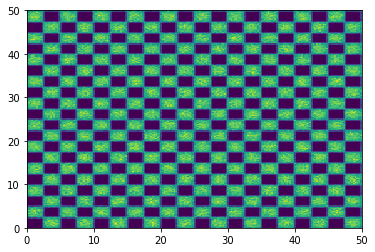

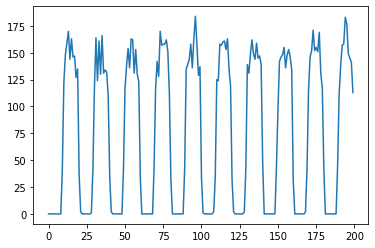

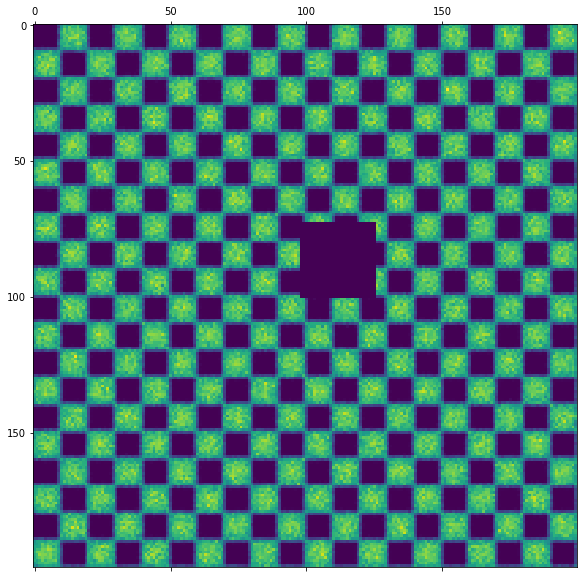

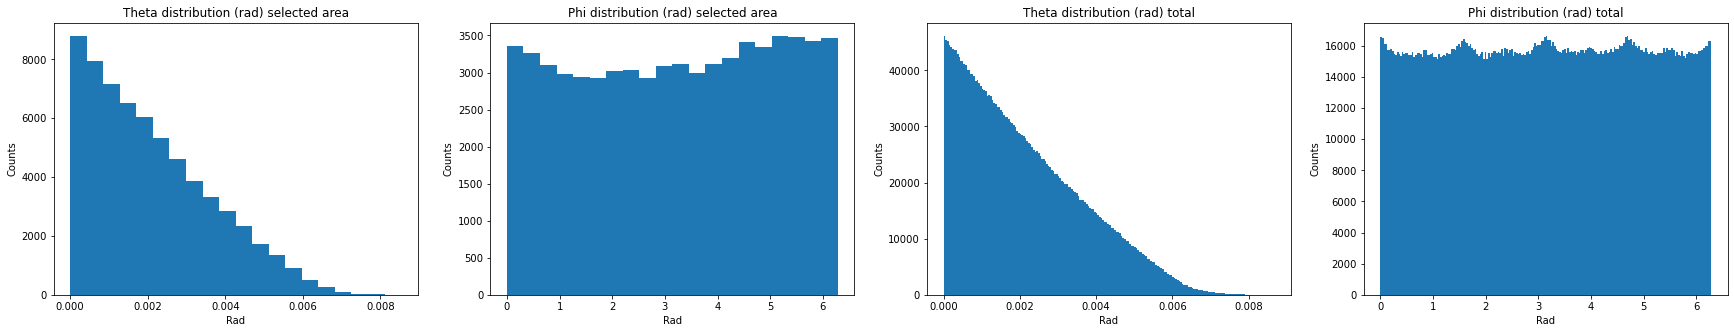

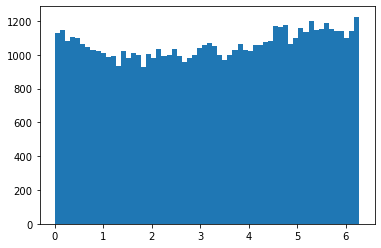

<ipython-input-8-4582113faf67>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


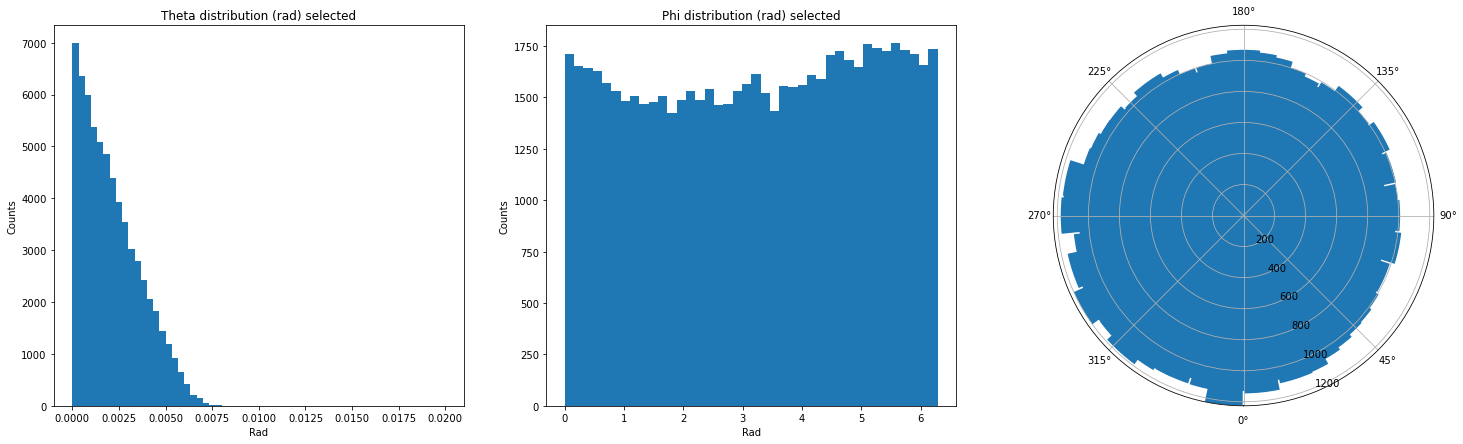

Maximum expected L/D factor:  160.0
Maximum expected angle:  0.006249918621698962
Distribution theta max:  0.008532824506463088
Measured L/D factor:  117.1973323099949
Distribution phi average:  3.2105623174437756
Total theta max:  0.00867944167742385
Total measured L/D factor:  115.21767730744206
Total phi average:  3.1459266959569416


In [9]:
IndexX = 73
IndexY = 98
bonus = 28
histogram (IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP,col_D,col_L)

51.0


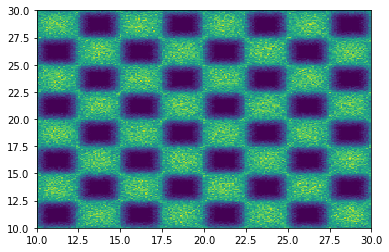

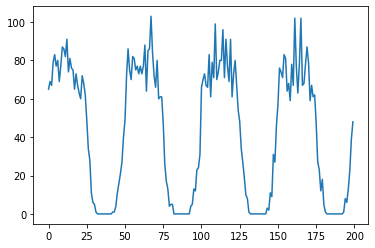

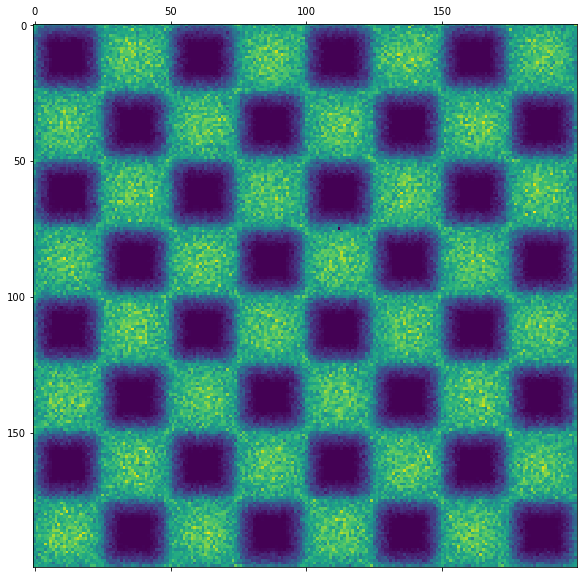

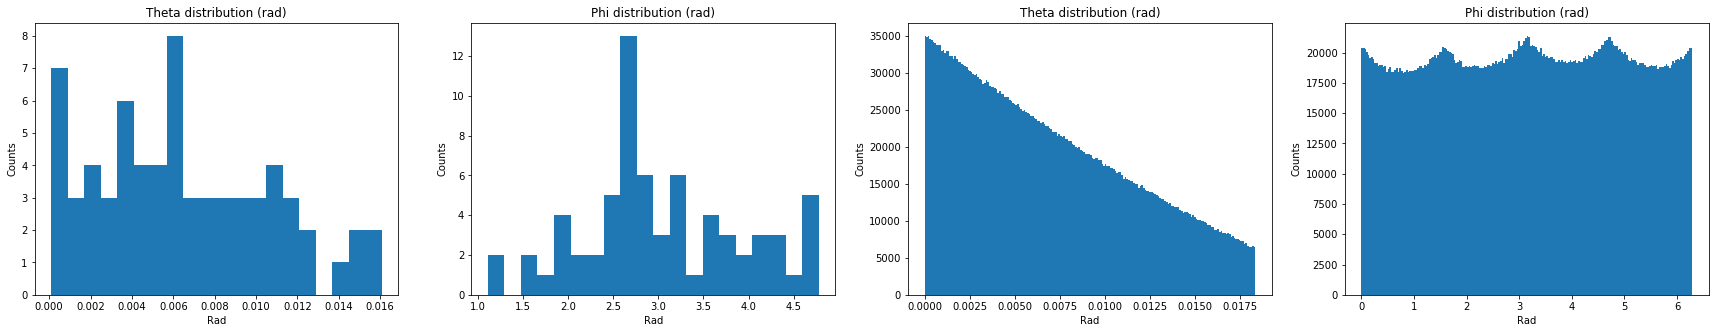

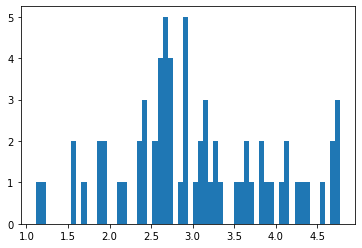

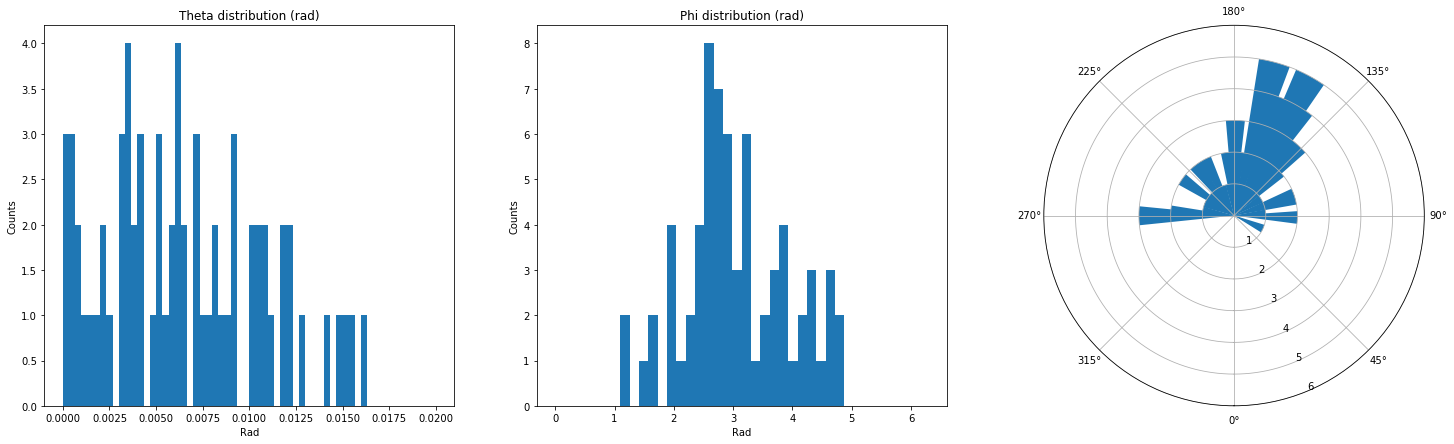

Distribution theta max:  0.01608463272872873
Measured L/D factor:  62.17650408236559
Distribution phi average:  3.048423762095558
Total theta max:  0.018374068090981632
Total measured L/D factor:  54.430653047415625
Total phi average:  3.1571267050526455


In [5]:
IndexX = 75
IndexY = 112
bonus = 1
histogram (IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP)

51.0


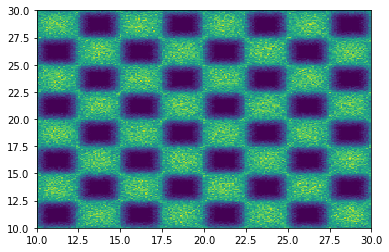

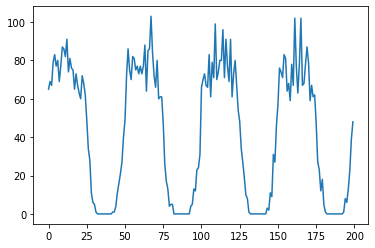

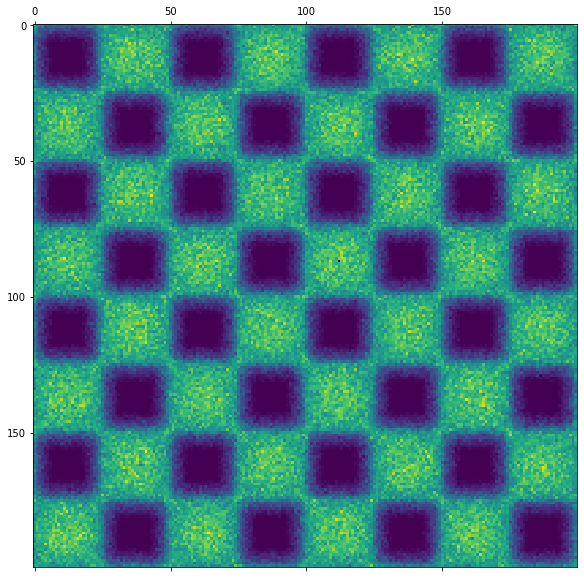

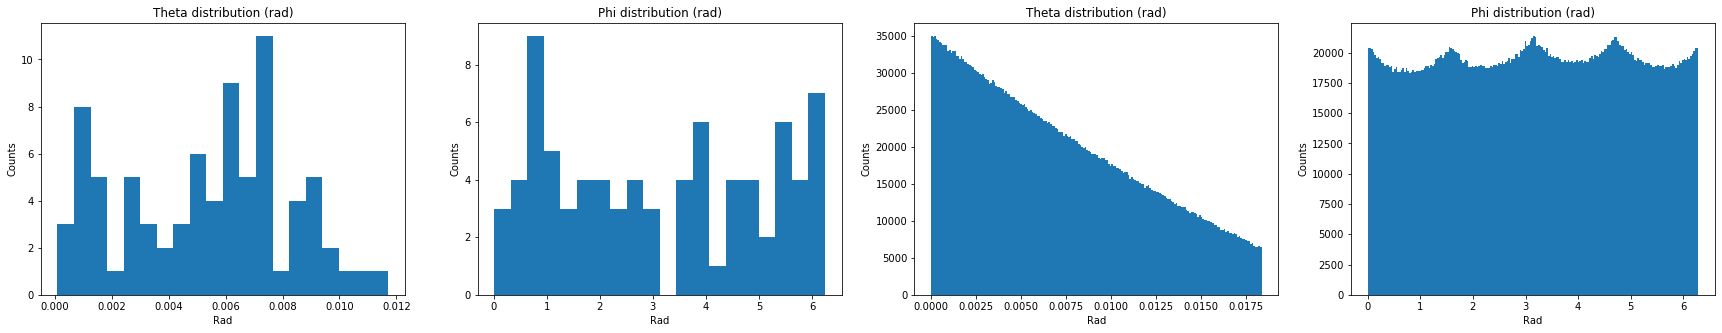

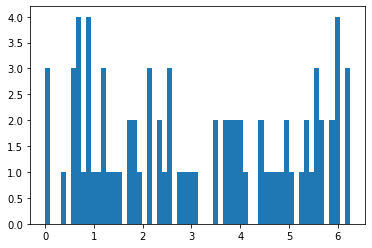

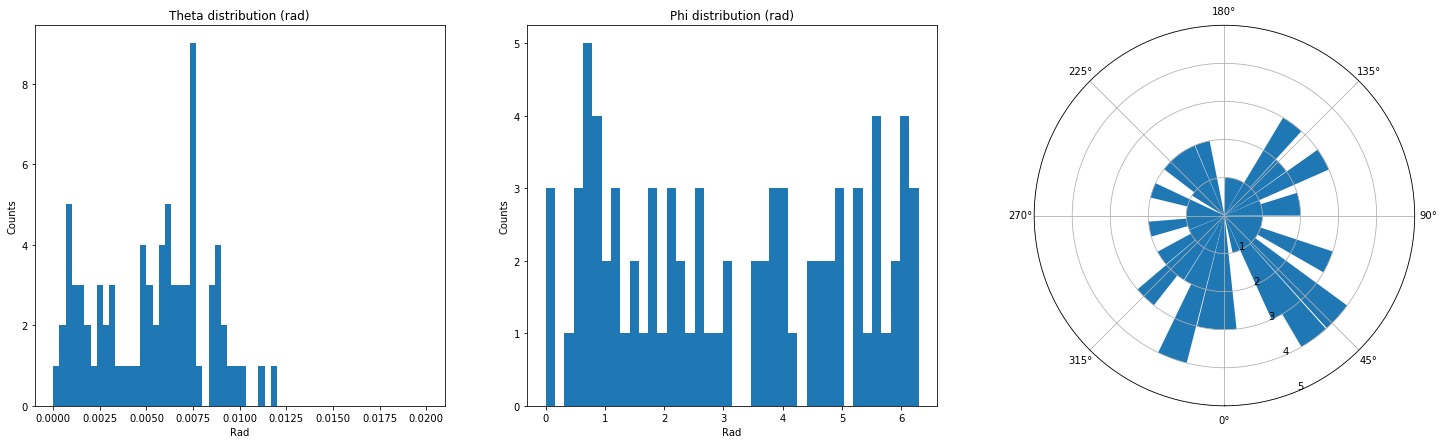

Distribution theta max:  0.01171956657885298
Measured L/D factor:  85.33129398101696
Distribution phi average:  3.1173807095026347
Total theta max:  0.018374068090981632
Total measured L/D factor:  54.430653047415625
Total phi average:  3.1571267050526455


In [6]:
IndexX = 87
IndexY = 112
bonus = 1
histogram (IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP)